In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [12]:
train_labels.shape

(60000,)

In [13]:
test_labels.shape

(10000,)

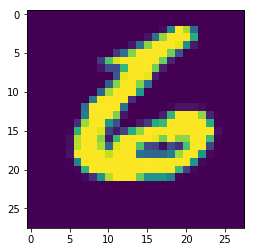

In [14]:
plt.imshow(test_images[-1])

In [6]:
test_labels[-1]

6

In [15]:
test_images[-1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   8, 117, 254, 220,  89,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  95, 212, 253, 253, 253, 157,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         16,  95, 209, 253, 253, 253, 245, 125,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40,  96,
        206, 253, 254, 253, 253, 198,  64,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

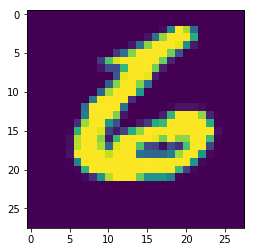

In [17]:
plt.imshow(test_images[-1])

In [18]:
test_images[-1]

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5   

In [23]:
len(train_images[0])

784

In [24]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [26]:
len(test_images[0])

784

In [27]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [30]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [31]:
# Train the model.
#1 epoch là một lần “duyệt” qua hết số lượng mẫu trong tập huấn luyện
# batch size có giá trị là 32, đồng nghĩa: mỗi lần cập nhật trọng số, bạn sử dụng 32 images
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2282 - acc: 0.9307
Epoch 2/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1543 - acc: 0.9530
Epoch 3/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.1230 - acc: 0.9626
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.1066 - acc: 0.9678
Epoch 5/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0926 - acc: 0.9715


In [32]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

10000/10000 [==============================] - 1s 52us/step


[0.10450433914824389, 0.9687]

In [33]:
# Save the model to disk.
model.save_weights('model123.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

In [34]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

[7 2 1 0 4]
[7 2 1 0 4]
